In [1]:
import math

import pandas as pd

df = pd.read_csv('pit_bb_war.csv', index_col='playerid')
df.insert(0, column='const', value=1)
df.head()

,const,Name,Team,W,L,SV,G,GS,IP,K/9,...,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR
playerid,,,,,,,,,,,,,,,,,,,,,
16149,1,Aaron Nola,PHI,11,13,0,32,32,205.0,10.32,...,0.289,73.0%,43.6%,9.8%,92.9,3.25,2.74,2.58,2.77,6.3
16137,1,Carlos Rodon,SFG,14,8,0,31,31,178.0,11.98,...,0.293,75.1%,34.1%,6.5%,95.5,2.88,2.64,2.25,2.91,6.2
8700,1,Justin Verlander,HOU,18,4,0,28,28,175.0,9.51,...,0.240,80.5%,37.9%,6.2%,95.1,1.75,2.66,2.49,3.23,6.1
18684,1,Sandy Alcantara,MIA,14,9,0,32,32,228.2,8.15,...,0.262,78.8%,53.4%,8.5%,98.0,2.28,2.92,2.99,3.29,5.7
14107,1,Kevin Gausman,TOR,12,10,0,31,31,174.2,10.56,...,0.363,74.0%,39.2%,8.5%,94.9,3.35,3.34,2.38,2.76,5.7


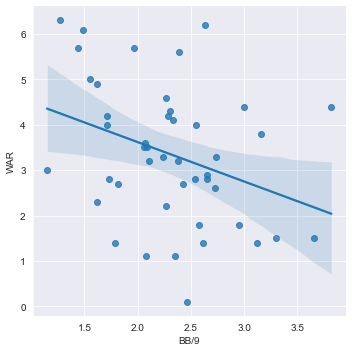

In [2]:
import seaborn as sns

sns.lmplot(data=df, x='BB/9', y='WAR')

In [3]:
import statsmodels.api as sm

model = sm.OLS(endog=df['WAR'], exog=df[['const', 'BB/9']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    WAR   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     5.626
Date:                Tue, 15 Nov 2022   Prob (F-statistic):             0.0222
Time:                        21:01:25   Log-Likelihood:                -79.566
No. Observations:                  45   AIC:                             163.1
Df Residuals:                      43   BIC:                             166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3560      0.871      6.152      0.0

## Velo Analysis

In [4]:
import numpy as np

df_velo = pd.read_csv('pit_vel.csv', index_col='playerid')
df_velo['WAR'] = df.WAR
df_velo.insert(0, column='const', value=1)
df_velo.head()

,const,Name,Team,IP,vFA,vFC,vFS,vSI,vCH,vSL,vCU,vCS,vKN,vSB,WAR
playerid,,,,,,,,,,,,,,,
18684,1,Sandy Alcantara,MIA,228.2,98.0,NaN,NaN,97.8,91.7,89.9,84.1,NaN,NaN,NaN,5.7
13125,1,Gerrit Cole,NYY,200.2,97.8,92.3,NaN,NaN,89.7,88.7,82.9,NaN,NaN,NaN,3.3
19755,1,Shohei Ohtani,LAA,166.0,97.4,90.5,89.3,97.2,91.9,85.3,77.9,NaN,NaN,NaN,5.6
21483,1,Shane McClanahan,TBR,166.1,97.0,NaN,NaN,NaN,87.9,89.6,82.3,NaN,NaN,NaN,3.5
18525,1,Dylan Cease,CHW,184.0,96.9,NaN,78.0,NaN,NaN,87.5,81.3,NaN,NaN,NaN,4.4


In [5]:
# if the pitcher doesn't have the pitch, drop the pitcher
fastball = df_velo[['const', 'vFA', 'WAR']].dropna(axis=0)

fastball

,const,vFA,WAR
playerid,,,
18684,1,98.0,5.7
13125,1,97.8,3.3
19755,1,97.4,5.6
21483,1,97.0,3.5
18525,1,96.9,4.4
19361,1,96.2,4.6
22250,1,96.1,3.2
15038,1,95.7,1.4
16137,1,95.5,6.2


In [6]:
results_FA = sm.OLS(endog=fastball.WAR, exog=fastball[['const', 'vFA']]).fit()
print(results_FA.summary())

                            OLS Regression Results                            
Dep. Variable:                    WAR   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     6.690
Date:                Tue, 15 Nov 2022   Prob (F-statistic):             0.0132
Time:                        21:01:25   Log-Likelihood:                -79.079
No. Observations:                  45   AIC:                             162.2
Df Residuals:                      43   BIC:                             165.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.7390      8.931     -2.210      0.0

In [12]:
# import h-move pitches
df_mov = pd.read_csv('pit_h_mov.csv', index_col='playerid')
df_vert = pd.read_csv('pit_v_mov.csv', index_col='playerid')
# concat, takes the last 10 columns of vertical move and adds it to the h-move
df_mov = pd.concat([df_mov, df_vert.iloc[:,-10:]], axis=1)
df_mov.head()

,Name,Team,IP,FA-X,FC-X,FS-X,SI-X,CH-X,SL-X,CU-X,...,FA-Z,FC-Z,FS-Z,SI-Z,CH-Z,SL-Z,CU-Z,CS-Z,KN-Z,SB-Z
playerid,,,,,,,,,,,,,,,,,,,,,
15467,Marco Gonzales,SEA,183.0,6.6,1.3,NaN,7.9,10.0,NaN,-3.5,...,8.3,5.6,NaN,5.5,2.8,NaN,-8.6,NaN,NaN,NaN
21483,Shane McClanahan,TBR,166.1,6.2,NaN,NaN,NaN,9.2,-1.9,-4.2,...,9.2,NaN,NaN,NaN,4.9,1.2,-7.4,NaN,NaN,NaN
6902,Martin Perez,TEX,196.1,5.9,0.6,NaN,9.3,8.1,-2.0,-3.6,...,8.0,6.1,NaN,5.0,4.2,2.0,-3.7,NaN,NaN,NaN
19244,Cole Irvin,OAK,181.0,5.6,0.9,NaN,8.3,7.8,-5.3,-2.7,...,8.5,4.0,NaN,6.1,3.1,-2.4,-5.3,NaN,NaN,NaN
16511,Jordan Montgomery,- - -,178.1,4.9,-0.2,NaN,9.5,6.2,NaN,-1.7,...,7.9,4.5,NaN,5.0,5.9,NaN,-3.8,NaN,NaN,NaN


In [42]:
import math
# get fastball h/v
fa_move = df_mov[['FA-X', 'FA-Z']]
# add WAR
fa_move['WAR'] = df.WAR
# add const
fa_move.insert(0, 'const', value=1)
# vectorize movement
vect = fa_move['FA-X']**2 + fa_move['FA-Z']**2
fa_move['FA-MAG'] = vect
fa_move['FA-MAG'] = fa_move['FA-MAG'].apply(lambda v: math.sqrt(v))
fa_move

/var/folders/nz/57m0v30s0kqdtdm5876x20qw0000gn/T/ipykernel_9247/4091266253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa_move['WAR'] = df.WAR
/var/folders/nz/57m0v30s0kqdtdm5876x20qw0000gn/T/ipykernel_9247/4091266253.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa_move['FA-MAG'] = vect
/var/folders/nz/57m0v30s0kqdtdm5876x20qw0000gn/T/ipykernel_9247/4091266253.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,const,FA-X,FA-Z,WAR,FA-MAG
playerid,,,,,
15467,1,6.6,8.3,0.1,10.604244
21483,1,6.2,9.2,3.5,11.094143
6902,1,5.9,8.0,3.8,9.940322
19244,1,5.6,8.5,1.4,10.178900
16511,1,4.9,7.9,2.7,9.296236
12880,1,4.4,9.6,4.0,10.560303
11486,1,4.0,9.5,1.8,10.307764
17295,1,3.9,4.9,4.4,6.262587
16137,1,3.5,9.7,6.2,10.312129


In [44]:
results_fa_move = sm.OLS(endog=fa_move['WAR'], exog=fa_move[['const', 'FA-MAG']]).fit()
print(results_fa_move.summary())

                            OLS Regression Results                            
Dep. Variable:                    WAR   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                   0.04536
Date:                Tue, 15 Nov 2022   Prob (F-statistic):              0.832
Time:                        22:30:13   Log-Likelihood:                -82.309
No. Observations:                  45   AIC:                             168.6
Df Residuals:                      43   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7043      1.654      2.240      0.0

In [49]:
# get fastball h/v
sl_move = df_mov[['SL-X', 'SL-Z']].dropna()
# add WAR
sl_move['WAR'] = df.WAR
# add const
sl_move.insert(0, 'const', value=1)
# vectorize movement
vect = sl_move['SL-X']**2 + sl_move['SL-Z']**2
sl_move['SL-MAG'] = vect
sl_move['SL-MAG'] = sl_move['SL-MAG'].apply(lambda v: math.sqrt(v))
sl_move

,const,SL-X,SL-Z,WAR,SL-MAG
playerid,,,,,
21483,1,-1.9,1.2,3.5,2.247221
6902,1,-2.0,2.0,3.8,2.828427
19244,1,-5.3,-2.4,1.4,5.818075
11486,1,-0.7,3.5,1.8,3.569314
17295,1,-2.1,-4.1,4.4,4.606517
16137,1,-4.5,-1.3,6.2,4.684015
16256,1,-2.5,-4.4,2.6,5.060632
13743,1,-2.2,-0.3,5.0,2.220360
2233,1,6.4,-2.6,2.8,6.907966


In [50]:
results_fa_move = sm.OLS(endog=sl_move['WAR'], exog=sl_move[['const', 'SL-MAG']]).fit()
print(results_fa_move.summary())

                            OLS Regression Results                            
Dep. Variable:                    WAR   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     3.457
Date:                Tue, 15 Nov 2022   Prob (F-statistic):             0.0714
Time:                        22:34:41   Log-Likelihood:                -65.035
No. Observations:                  37   AIC:                             134.1
Df Residuals:                      35   BIC:                             137.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2250      0.504      8.375      0.0

## Pitch Extension

In [51]:
ext = pd.read_csv('pit_ext.csv', index_col='player_id')
ext.insert(0, 'const', value=1)
model_ext = sm.OLS(endog=ext['woba'], exog=ext[['const', 'release_extension']]).fit()
print(model_ext.summary())

                            OLS Regression Results                            
Dep. Variable:                   woba   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004709
Date:                Tue, 15 Nov 2022   Prob (F-statistic):              0.945
Time:                        23:09:44   Log-Likelihood:                 986.20
No. Observations:                 668   AIC:                            -1968.
Df Residuals:                     666   BIC:                            -1959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3194      0.03